# Линейные методы в машинном обучении. Линейные методы в регрессии

## Среднеквадратическая ошибка

<div align="center"><img src="images/1.png" width="700px" /></div>

### $$ MSE(a, X) = \frac{1}{l} \sum_{i=1}^l (a(x_i)−y_i)^2 $$

<div align="center"><img src="images/2.png" width="700"/></div>


### $$ a_{опт}(x) = argmin_x Q(a, X) $$

## Линейные модели

### $$ a(x) = w_0 + \sum_{j=1}^d w_j x^j $$

- $ w_j $ - вес j-го признака
- $ x^j $ - значение j-го признака
- $ w_0 = const $

Введем константный признак $ x_0 = 1 $:

### $$ a(x) = \sum_{j=0}^d w_j x^j = \langle w, x \rangle $$

- $ w_j $ - вес j-го признака
- $ x^j $ - значение j-го признака
- $ w_0 = w_0 x^0 $

## Вернемся к среднеквадратической ошибке

### $$ Q(a, X) = \frac{1}{l} \sum_{i=0}^l (a(x_i)−y_i)^2 = \frac{1}{l} \sum_{i=0}^l (\langle w, x_i \rangle − y_i)^2 $$

- $ w $ - вектор весов модели
- $ x_i $ - вектор значений признаков объекта
- $ y_i $ - истинный ответ для i-го объекта
- $ l $ - количество объектов выборки

## Линейная модель в задаче регрессии

Задача подбора весов - минимизация среднеквадратичной ошибки.

### $$ Q(a, X) = \frac{1}{l} \sum_{i=0}^l (\langle w, x_i \rangle − y_i)^2 \rightarrow min $$

- $ d $ неизвестных
- константный признак
- выпуклая функция ошибки - т.е. можно дифференцировать (благодаря тому, что минимизируется среднеквадратичная ошибка)

### $$ Q(w, X) = \frac{1}{l} || Xw - y ||^2 \rightarrow \underset{w}{min} $$

Такая постановка задачи имеет однозначное аналитическое решение:

### $$ w_{опт} = (X^T X)^{-1} X^T y $$

но вычислительно затратно по времени обращать матрицу при большом количестве признаков и на большой выборке. Поэтому для решения таких задач используют градиентный спуск.

# Градиентный спуск

Изначально мы не знаем, какие веса будут оптимальны для модели. Поэтому выберем рандомные веса, а затем будем их корректировать в сторону уменьшения среднеквадратической ошибки. Дальше в примере в роли рандома будем использовать инициализацию весов нулями:

### $$ w^{[0]} = 0 $$

Дальше пошагово будем менять веса на небольшой шаг $ \eta $. Этот шаг - вектор, совпадающий по размерности с весами. На каждом шаге нам нужно изменять веса в те стороны в пространстве весов, чтобы ошибка уменьшалась наилучшим образом. Чем ближе мы к точке минимума ошибки, тем аккуратнее надо шагать - т.е. уменьшать $ \eta_t <= \eta_{t-1} $. Повторять будем до тех пор, пока изменение шага или изменение ошибки значимо.

Иначе говоря, на каждом шаге мы будем двигаться в пространстве весов в сторону антиградиента функции ошибки.

Обозначим номер итерации градиентного спуска переменной $ t = 1, 2, 3, ... $. Тогда изменение весов на каждом шаге:

### $$ \vec{w}^{[t]} = \vec{w}^{[t-1]} - \eta_t \nabla Q(\vec{w}^{[t-1]}, X) $$

Условия остановки:

- $ ||\vec{w}^{[t]} - \vec{w}^{[t-1]} || < \epsilon $
- $ Q(\vec{w}^{[t]}, X) - Q(\vec{w}^{[t-1]}, X) < \epsilon $

## Градиентный спуск для линейной регрессии

Рассмотрим случай линейной регрессии с одним признаком:

### $$ a(x) = w_0 + w_1 x $$

Тогда функционал ошибки:

### $$ Q(w_0, w_1, X) = \frac{1}{l} \sum \limits_{i=1}^{l} (w_1x_i + w_0 - y_i)^2 $$

Производные функионала ошибки по осям признаков в пространстве признаков - это направления, против которых нужно двигаться:

### $$ \frac{\partial Q}{\partial w_1} = \frac{2}{l} \sum \limits_{i=1}^{l} (w_1x_i + w_0 - y_i)x_i $$

### $$ \frac{\partial Q}{\partial w_0} = \frac{2}{l} \sum \limits_{i=1}^{l} (w_1x_i + w_0 - y_i) $$

На следующих графиках слева показано изменение весов в пространстве весов, справа - изменение прямой, сформированной этими коэффициентами.

<div align="center"><img src="images/3.png" width="600"/></div>

<div align="center"><img src="images/4.png" width="600"/></div>

<div align="center"><img src="images/5.png" width="600"/></div>

Ошибка при этом изменяется монотонно:

<div align="center"><img src="images/6.png" width="400"/></div>

### Стохастический градиентный спуск

В обычном градиентном спуске мы всегда рассматриваем все объекты выборки. В стохастическом - много раз берем по одному объекту.

$$ \vec{w}^{[t]} = \vec{w}^{[t-1]} - \eta_t \nabla Q(\vec{w}^{[t-1]}, \{x_i\}) ,$$

где $ x_i $ - случайный объект из выборки.

<div align="center"><img src="images/7.png" width="700"/></div>

# Линейная регрессия в библиотеке sklearn

Создадим набор данных, которым хотим линейно приближать:

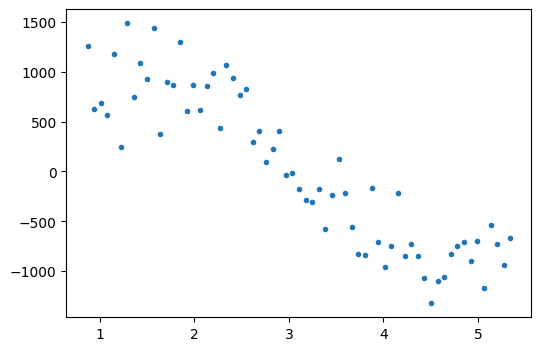

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4

x = np.array([i * np.pi / 180 for i in range(50, 310, 4)])
np.random.seed(1)
y = 1000 * np.sin(x) + np.random.normal(0, 300, len(x))
data = pd.DataFrame(np.column_stack([x, y]),columns=['x', 'y'])
plt.plot(data['x'], data['y'], '.')

Обучим модель и посмотрим, какую прямую она построит.

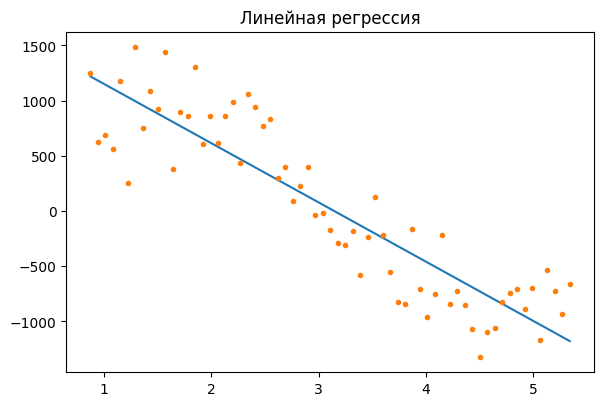

In [3]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(data[["x"]], data["y"])
y_pred = linreg.predict(data[["x"]])


def plot_lr(x, y, y_pred, subplot_number=111, title="Линейная регрессия"):
    plt.subplot(subplot_number)
    plt.tight_layout()
    plt.plot(x, y_pred)
    plt.plot(x, y, ".")
    plt.title(title)

plot_lr(data["x"], data["y"], y_pred)

И оценим среднеквадратическую ошибку нашей модели на обучающей выборке.

In [4]:
from sklearn.metrics import mean_squared_error

mean_squared_error(data["y"], y_pred)

117221.1934526236

Несмотря на то, что мы видим, что линейная регрессия не может излишне переобучиться на той выборке, на которой обучалась, в реальных задачах выборку нужно делить на тренировочную и тестовую.

# Борьба с переобучением линейных моделей

Небольшой лайфхак: мы не можем достаточно хорошо описать синус линейной моделью: для этого нужен полином более высокой степени. Чтобы не менять саму модель под полиномиальную, можем создать дополнительные признаки - степени исходного признака. Но этим же приемом мы можем и сымитировать ситуацию переобучения. Наилучшая аппроксимация нашего куска синуса, как мы позже увидим, это полином третьей степени. Если добавлять степени выше, то это уже будет избыточно повторять данные из обучающей выборки - т.е. будет возникать ситуация переобучения. Ниже по конспекту мы увидим это на графиках.

In [7]:
# добавляем полиномиальные признаки в данные
for i in range(2, 16):
    data[f"x_{i}"] = data["x"] ** i

data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.872665,1253.348052,0.761544,0.664572,0.579949,0.506101,0.441656,0.385418,0.336340,0.293512,0.256138,0.223522,0.195060,0.170222,0.148547,0.129632
1,0.942478,625.490070,0.888264,0.837169,0.789014,0.743628,0.700853,0.660538,0.622543,0.586733,0.552982,0.521174,0.491195,0.462940,0.436311,0.411213
2,1.012291,689.596570,1.024733,1.037328,1.050078,1.062984,1.076049,1.089275,1.102663,1.116216,1.129935,1.143823,1.157882,1.172114,1.186520,1.201103
3,1.082104,561.057006,1.170949,1.267089,1.371122,1.483697,1.605515,1.737334,1.879977,2.034331,2.201357,2.382098,2.577678,2.789316,3.018331,3.266148
4,1.151917,1173.167746,1.326913,1.528495,1.760699,2.028180,2.336296,2.691220,3.100062,3.571015,4.113514,4.738429,5.458278,6.287485,7.242662,8.342948


Будем обучать 15 линейных регрессий - для каждой максимальной степени полинома. Создадим функцию, которая обучает регрессию, принимая на вход максимальную степень x:

In [8]:
PLOT_POWERS = [1, 3, 6, 9, 12, 15]  # обозначим, для каких степеней хотим вывести графики

def linear_regression(data, power):
    features = ["x"] + [f"x_{i}" for i in range(2, power+1)]

    # обучаем модель, сохраняем предсказания
    linreg = LinearRegression()
    linreg.fit(data[features], data["y"])
    y_pred = linreg.predict(data[features])
    
    if power in PLOT_POWERS:  # для некоторых степеней выведем графики
        plot_lr(data["x"], data["y"], y_pred, 230 + PLOT_POWERS.index(power) + 1, f"График для степени {power}")

    mse = mean_squared_error(data["y"], y_pred)  # посчитаем среднеквадратическую ошибку

    return mse, linreg.intercept_, *linreg.coef_

И теперь, используя функцию, обучим модели и построим графики для некоторых из них.

/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_30140/877383141.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_30140/877383141.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_30140/877383141.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_30140/877383141.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_30140/877383141.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


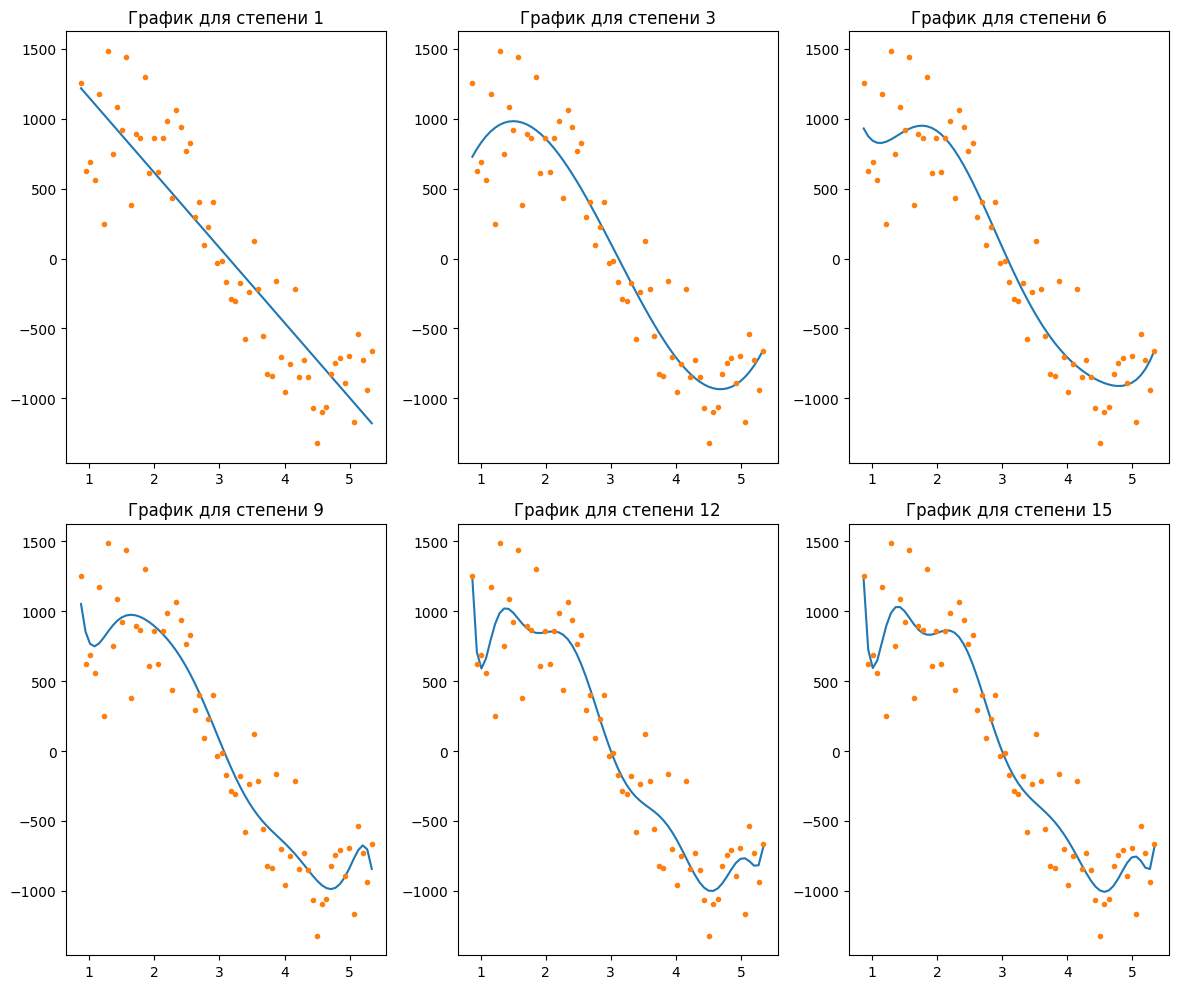

In [9]:
rcParams['figure.figsize'] = 12, 10


# создадим датафрейм для удобного хранения получившихся метрик и коэффициентов наших моделей
columns = ["mse", "intercept"] + [f"coef_x_{i}" for i in range(1, 16)]
index = [f"model_pow_{i}" for i in range(1, 16)]
coef_matrix_simple = pd.DataFrame(index=index, columns=columns)

for i in range(1, 16):
    coef_matrix_simple.iloc[i-1, 0:i+2] = linear_regression(data, i)

In [10]:
coef_matrix_simple

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,117221.193453,1686.005155,-536.382017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,117163.698162,1725.233849,-567.095948,4.943198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,73138.562099,-701.871788,2511.479539,-1104.272443,119.013811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,73133.04584,-640.152932,2403.448544,-1041.820781,104.508062,1.167301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,71635.947563,1689.165604,-2784.694497,3130.019956,-1431.552019,263.932943,-16.916137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,70328.00335,6703.00296,-16327.365824,17130.400981,-8582.354365,2185.600566,-276.916231,13.948416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,69553.348054,15624.583378,-44633.237557,52941.647385,-32123.027569,10926.132428,-2122.348835,220.396848,-9.493278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,69368.975611,5524.659304,-7840.313268,-2146.471434,12302.335741,-10275.193701,4039.413319,-849.850203,92.546893,-4.105668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,67889.326036,72157.166521,-281813.310269,471717.684631,-441225.729874,255275.565226,-94970.618371,22747.04162,-3386.739986,284.893535,-10.336102,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,61711.438023,390410.938312,-1739166.844354,3330944.411692,-3611231.165801,2459851.749992,-1102659.426717,330253.25896,-65433.012705,8229.918771,-594.940155,18.81761,NaN,NaN,NaN,NaN,NaN


Оказывается, переобучение при использовании линейных моделей можно увидеть не только на графике! Обратите внимание: коэффициенты при больших степенях полинома огромные!

# Регуляризация

- Большие веса переобученной модели
- Идея: включить их в функционал ошибки, чтобы минимизировать не только отклонения ответов, но и веса модели

## $ L_2 $-регуляризация

- Будем минимизировать сумму квадратов весов:
  $$ ||w||^2 = \sum\limits_{j=1}^{d}w_j^2 $$

$$ Q(w, X) + \lambda ||w||^2 \rightarrow \min\limits_w $$

- Чем $\lambda$ больше, тем модель проще
- Чем $\lambda$ меньше, тем выше риск переобучения

Разложим этот функционал ошибки на две составляющие:

$$ Q(w, X) \rightarrow \min\limits_w $$

$$ ||w||^2 \le C $$

Линейный регрессор с L2-регуляризацией реализован в классе Ridge:

In [12]:
from sklearn.linear_model import Ridge

# дальше будем работать со всеми признаками, чтобы оценить, как меняется график в зависимости от альфы
features = ["x"] + [f"x_{i}" for i in range(2, 16)]

# рассмотрим следующие значения коэффициента альфа:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 1000]
PLOT_ALPHAS = [1e-15, 1e-4, 1e-3, 1, 5, 1000]

def ridge_regression(data, alpha):
    # обучение модели
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[features], data["y"])
    y_pred = ridgereg.predict(data[features])
    
    if alpha in PLOT_ALPHAS:  # для некоторых степеней выведем графики
        plot_lr(data["x"], data["y"], y_pred, 230 + PLOT_ALPHAS.index(alpha) + 1, f"График для alpha={alpha}")

    mse = mean_squared_error(data["y"], y_pred)  # посчитаем среднеквадратическую ошибку

    return mse, ridgereg.intercept_, *ridgereg.coef_

/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_30140/877383141.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_30140/877383141.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.642e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.85535e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_30140/877383141.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/mikhail/anaconda3/lib/python3.10/site-packages

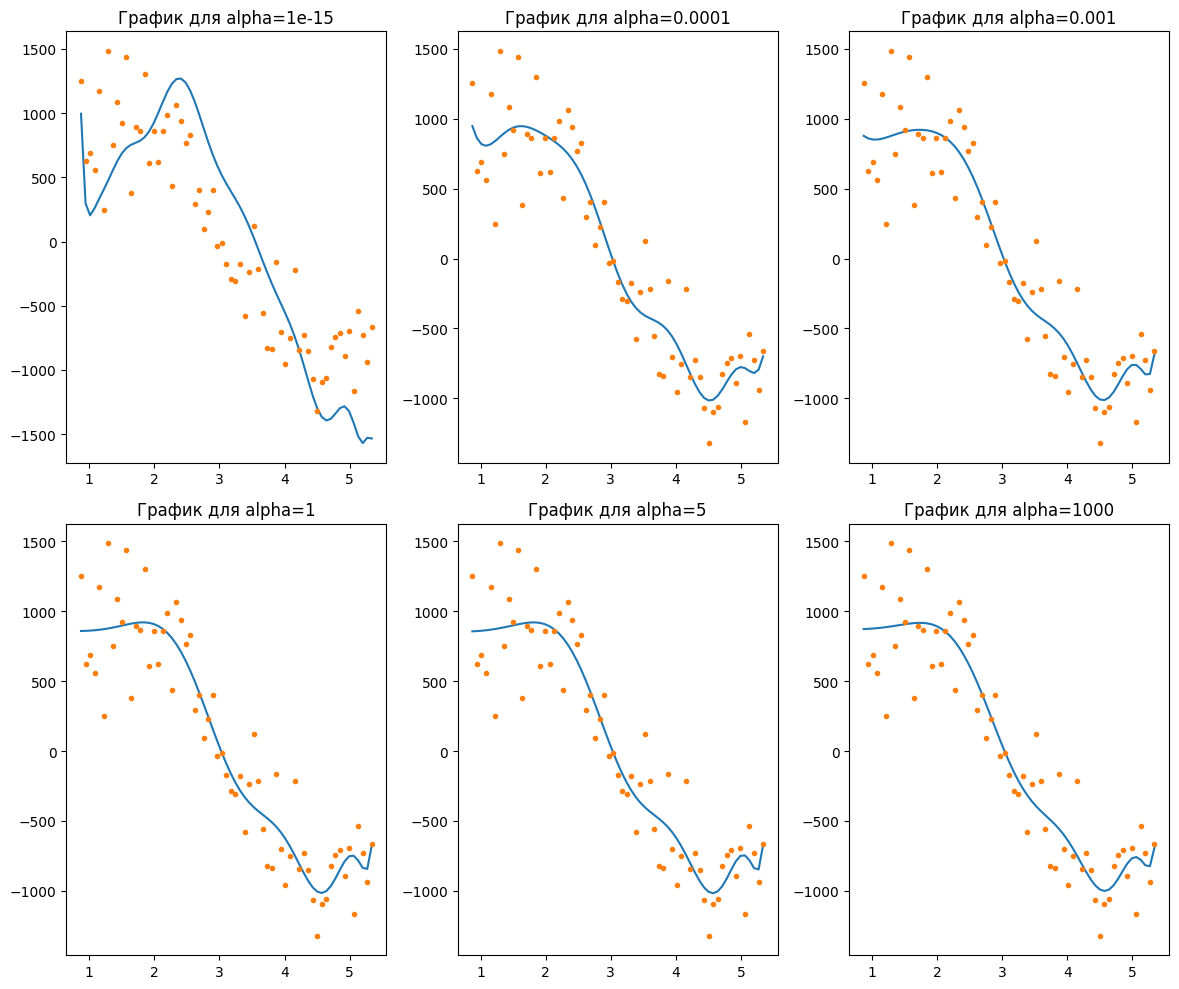

In [13]:
# создадим датафрейм для удобного хранения получившихся метрик и коэффициентов наших моделей
columns = ["mse", "intercept"] + [f"coef_x_{i}" for i in range(1, 16)]
index = [f"alpha_{alpha}" for alpha in alpha_ridge]
coef_matrix_ridge = pd.DataFrame(index=index, columns=columns)

# запишем данные по регресси с каждым значением альфа в датафрейм
for i, alpha in enumerate(alpha_ridge):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, alpha)

In [14]:
coef_matrix_ridge

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,242188.578972,11396849.768848,-77831838.738443,241354045.323983,-450592469.618479,566259091.985096,-507417906.918872,335044468.230593,-166093488.792918,62377661.257885,-17764595.99018,3809259.611537,-604655.48627,68854.501048,-5316.239142,249.131015,-5.347405
alpha_1e-10,61264.926596,71318.095889,82217.609139,-1009216.068665,1769442.568772,-655544.744577,-1668282.743331,2912994.454225,-2409756.381072,1268506.584901,-460428.297842,118472.581339,-21648.928249,2753.725407,-232.145541,11.669037,-0.264859
alpha_1e-08,61435.234471,176612.016771,-551385.697959,501509.846096,127512.295095,-440831.165293,72325.917215,341558.46272,-375083.416576,204167.249794,-69018.695804,15260.929678,-2182.198547,186.131635,-7.012463,-0.125803,0.014591
alpha_0.0001,65887.617016,7559.525997,-11445.948417,-1046.866086,7047.022284,3402.96002,-4323.097821,-3618.804963,3351.550407,1915.862501,-3503.872895,2017.402947,-644.777133,126.092014,-15.061274,1.013157,-0.029498
alpha_0.001,66880.612246,2351.222722,-2396.011239,-521.129551,1454.529394,1120.447932,-771.346841,-1260.381287,619.392257,1079.505676,-1363.88068,723.920358,-222.093444,42.123128,-4.886529,0.318487,-0.008945
alpha_0.01,67438.038988,1137.721071,-305.267544,-163.042728,60.736251,152.071616,88.825352,-67.316691,-179.222116,201.289448,-69.490294,-7.75117,14.2594,-5.094188,0.906823,-0.083205,0.003139
alpha_1,67420.863777,861.375038,-3.622674,-2.70694,-1.224599,-0.822887,0.179412,4.165679,7.931788,2.541593,-11.04296,3.57633,1.463685,-1.147089,0.282468,-0.031633,0.00137
alpha_5,67427.577086,852.332651,-0.693943,-0.208273,0.704837,1.576781,2.311827,2.829652,2.58935,1.18925,-1.111111,-5.069218,5.148175,-2.051517,0.413071,-0.041982,0.001718
alpha_10,67425.768865,852.057632,-0.454327,-0.2888,0.224661,1.017735,2.17177,3.437491,3.563783,1.034913,-2.990812,-3.110286,4.22699,-1.808941,0.376055,-0.038912,0.001611
alpha_20,67425.856936,851.020627,-0.240351,-0.12095,0.287589,1.040229,2.225702,3.543404,3.720731,0.992982,-3.514744,-2.495807,3.913371,-1.721125,0.361995,-0.0377,0.001567


## $ L_1 $-регуляризация

- Будем минимизировать сумму модулей весов:
  $$ ||w||_1 = \sum\limits_{j=1}^{d}|w_j| $$

$$ Q(w, X) + \lambda ||w||_1 \rightarrow \min\limits_w $$

- Чем $\lambda$ больше, тем модель проще. При этом некоторые признаки могут занулиться (при совсем большом $\lambda$ - все признаки)
- Чем $\lambda$ меньше, тем выше риск переобучения

Линейный регрессор с L1-регуляризацией реализован в классе Lasso:

In [15]:
from sklearn.linear_model import Lasso

# дальше будем работать со всеми признаками, чтобы оценить, как меняется график в зависимости от альфы
features = ["x"] + [f"x_{i}" for i in range(2, 16)]

# рассмотрим следующие значения коэффициента альфа:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 1000]
PLOT_ALPHAS = [1e-15, 1e-4, 1e-3, 1, 5, 1000]

def lasso_regression(data, alpha):
    # обучение модели
    lassoreg = Lasso(alpha=alpha)
    lassoreg.fit(data[features], data["y"])
    y_pred = lassoreg.predict(data[features])
    
    if alpha in PLOT_ALPHAS:  # для некоторых степеней выведем графики
        plot_lr(data["x"], data["y"], y_pred, 230 + PLOT_ALPHAS.index(alpha) + 1, f"График для alpha={alpha}")

    mse = mean_squared_error(data["y"], y_pred)  # посчитаем среднеквадратическую ошибку

    return mse, lassoreg.intercept_, *lassoreg.coef_

/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.373e+06, tolerance: 3.970e+03
  model = cd_fast.enet_coordinate_descent(
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.373e+06, tolerance: 3.970e+03
  model = cd_fast.enet_coordinate_descent(
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

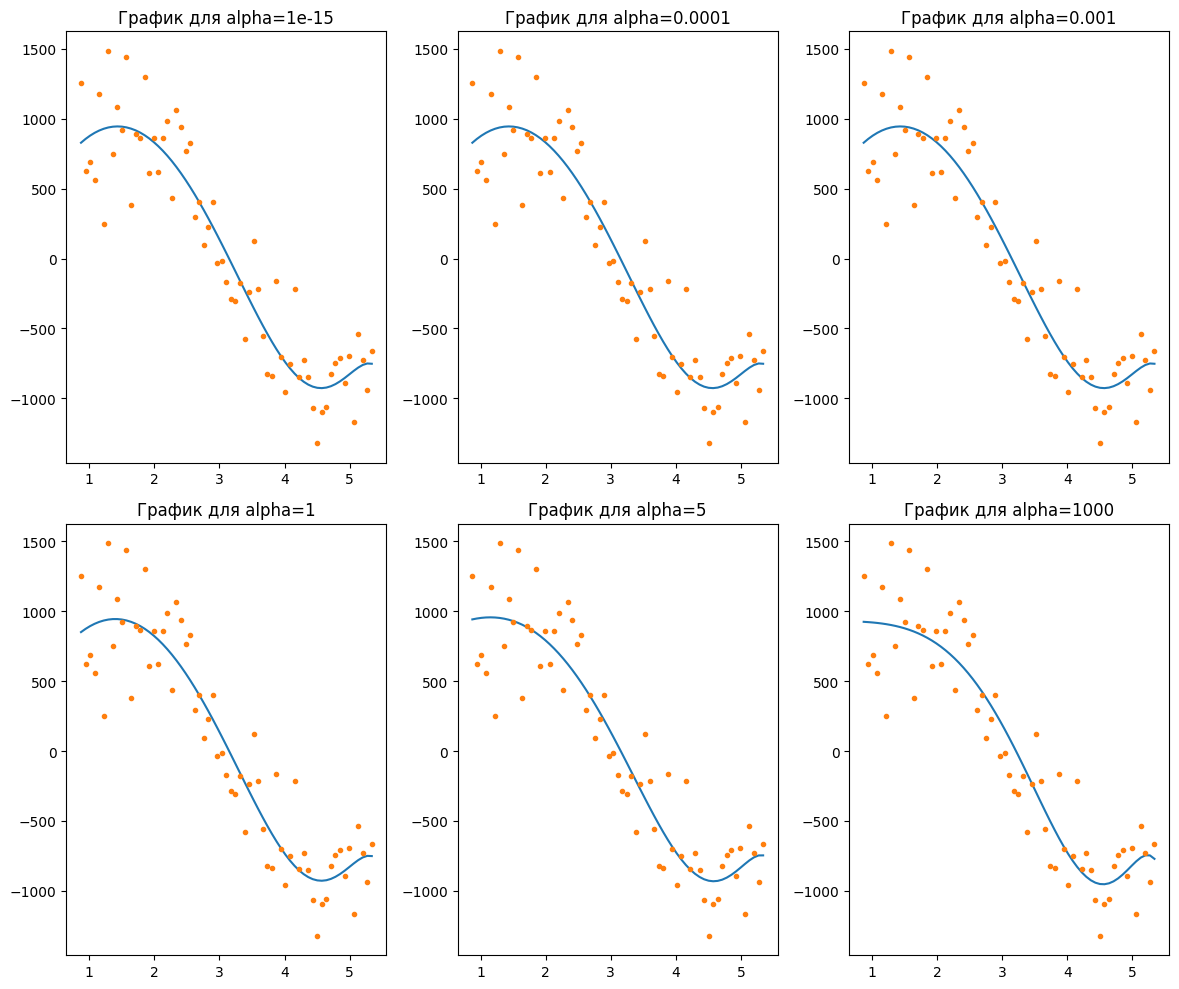

In [16]:
# создадим датафрейм для удобного хранения получившихся метрик и коэффициентов наших моделей
columns = ["mse", "intercept"] + [f"coef_x_{i}" for i in range(1, 16)]
index = [f"alpha_{alpha}" for alpha in alpha_lasso]
coef_matrix_lasso = pd.DataFrame(index=index, columns=columns)

# запишем данные по регресси с каждым значением альфа в датафрейм
for i, alpha in enumerate(alpha_lasso):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, alpha)

In [21]:
coef_matrix_lasso

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,73022.004325,193.687899,1029.394553,-333.884261,-15.78231,1.099879,0.433878,0.077464,0.010852,0.001289,0.000124,0.000006,-0.000001,-0.000001,-0.0,-0.0,-0.0
alpha_1e-10,73022.004325,193.687899,1029.394553,-333.884261,-15.78231,1.099879,0.433878,0.077464,0.010852,0.001289,0.000124,0.000006,-0.000001,-0.000001,-0.0,-0.0,-0.0
alpha_1e-08,73022.004327,193.6879,1029.394552,-333.88426,-15.78231,1.099879,0.433878,0.077464,0.010852,0.001289,0.000124,0.000006,-0.000001,-0.000001,-0.0,-0.0,-0.0
alpha_0.0001,73022.022829,193.698798,1029.380345,-333.878865,-15.782855,1.099848,0.433878,0.077464,0.010853,0.001289,0.000124,0.000006,-0.000001,-0.000001,-0.0,-0.0,-0.0
alpha_0.001,73022.189393,193.796895,1029.252476,-333.830308,-15.787757,1.099569,0.433878,0.077466,0.010853,0.001289,0.000124,0.000006,-0.000001,-0.000001,-0.0,-0.0,-0.0
alpha_0.01,73023.857847,194.777861,1027.973779,-333.344738,-15.836774,1.096777,0.433879,0.077486,0.010857,0.00129,0.000124,0.000006,-0.000001,-0.000001,-0.0,-0.0,-0.0
alpha_1,73239.563101,303.143008,886.63302,-279.63112,-21.264387,0.787308,0.434045,0.079662,0.011348,0.001371,0.000135,0.000008,-0.000001,-0.000001,-0.0,-0.0,-0.0
alpha_5,74782.915178,749.009229,304.622502,-58.176827,-43.857432,-0.366152,0.410505,0.089153,0.013468,0.001719,0.000184,0.000013,-0.000001,-0.000001,-0.0,-0.0,-0.0
alpha_10,76475.759175,1010.645527,0.0,32.197451,-44.525515,-2.038337,0.323321,0.092954,0.014994,0.002012,0.000228,0.000019,0.0,-0.000001,-0.0,-0.0,-0.0
alpha_20,77137.476111,1045.454382,0.0,3.656179,-33.045312,-3.039394,0.269951,0.092682,0.014946,0.002015,0.00023,0.00002,0.0,-0.0,-0.0,-0.0,-0.0


## Выбор типа регуляризации

### $L_2$-регуляризатор:

- штрафует модель за сложность
- гладкий и выпуклый - легко проводить минимизацию градиентными методами

### $L_1$-регуляризатор:

- тоже штрафует модель за сложность
- негладкий - сложнее оптимизировать
- зануляет признаки
- позволяет проводить отбор признаков